In [1]:
DATASET_data = "rec.mu2e.CRV_wideband_cosmics.CRVWB-000-006-000-012.root"
DATASET_mc = "nts.mu2e.CRV_wideband_cosmics-mc.config_0012_v1.root"

In [2]:
from mu2etools import *
from mu2etools import wideband
hep.style.use('ATLAS')  # or ATLAS/LHCb2

In [3]:
processor = wideband.DataProcessor(usexroot=True, fixtimes=False)
ar_data_sum_data = processor.getData(DATASET_data)

processor = wideband.DataProcessor(usexroot=True, treename='CrvWidebandTest/runSummary')
ar_data_sum_mc = processor.getData(DATASET_mc)

Processing file: root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-nts/nts/mu2e/CRV_wideband_cosmics-mc/config_0012_v1/root/71/d0/nts.mu2e.CRV_wideband_cosmics-mc.config_0012_v1.002001_00000398.root:CrvWidebandTest/runSummary - 100.0% complete

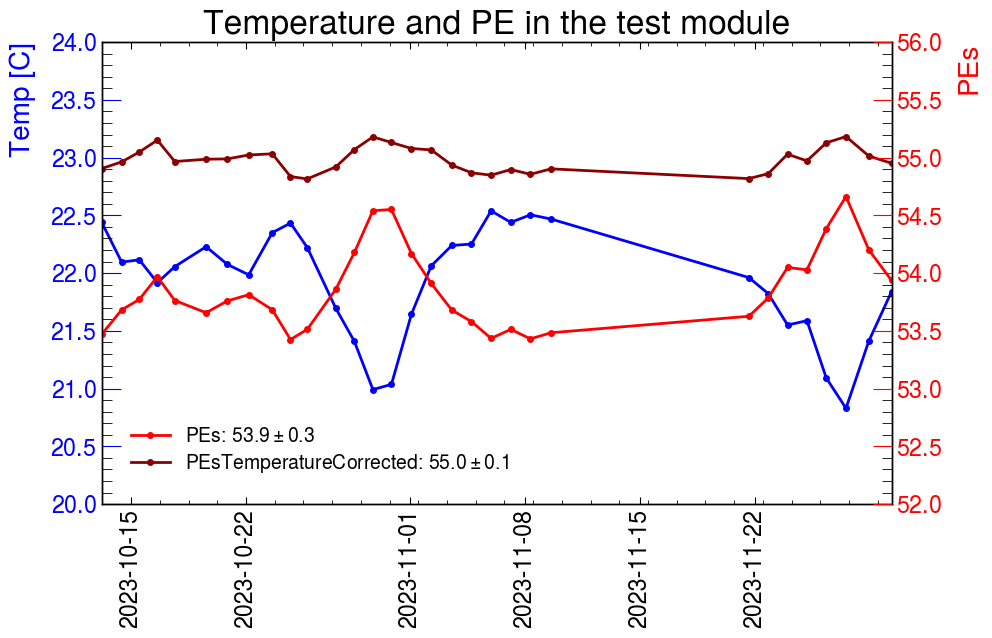

In [4]:
x = ar_data_sum_data["timestamp"].to_numpy()
y = ar_data_sum_data["meanTemperatures"][:, 1, 0].to_numpy()
#Mean PEs per subrun from FEBs 3 and 4
y2 = ak.ravel(ak.mean(ar_data_sum_data["PEs"][:, np.arange(3, 4), :], axis=-1))
y3 = ak.ravel(ak.mean(ar_data_sum_data["PEsTemperatureCorrected"][:, np.arange(3, 4), :], axis=-1))

fig, ax1 = plt.subplots(figsize=(10, 6))
# Plotting temperature on the primary y-axis (ax1)
ax1.plot(x.astype('datetime64[s]'), y, '.-', label='Temp [C]', color='blue')
ax1.set_ylabel('Temp [C]', color='blue')
ax1.set_ylim(20,24)
ax1.tick_params('y', colors='blue')
ax1.tick_params(axis='x', rotation=90)
# Creating a twin Axes for the secondary y-axis (y2)
ax2 = ax1.twinx()
ax2.plot(x.astype('datetime64[s]'), y2, '.-', label='PEs: $%.1f \pm %0.1f$'%(ak.mean(y2), ak.std(y2)), color='red')
ax2.plot(x.astype('datetime64[s]'), y3, '.-', label='PEsTemperatureCorrected: $%.1f \pm %0.1f$'%(ak.mean(y3), ak.std(y3)), color='darkred')
ax2.set_ylabel('PEs', color='red')
ax2.tick_params('y', colors='red')

plt.ylim(52, 56)
plt.legend()
plt.title('Temperature and PE in the test module');

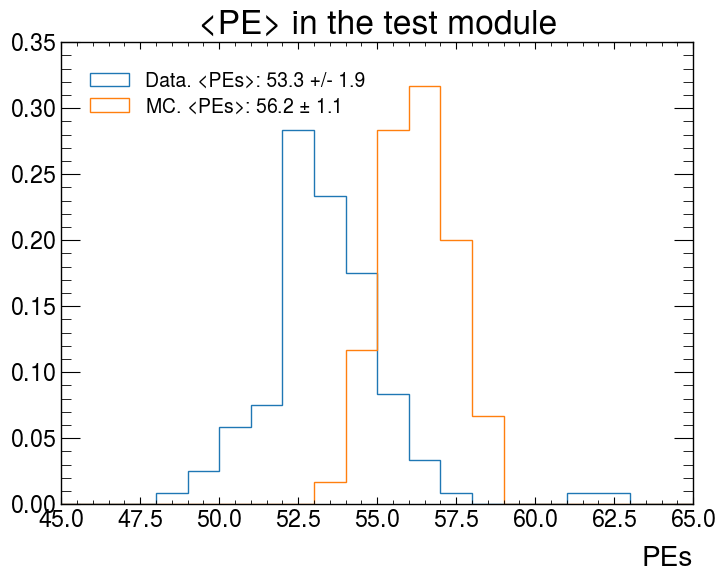

In [6]:
test_layers = np.arange(3, 5)

# Average PEs from 128 channels in Data
x_data = np.mean(ar_data_sum_data["PEs"][:, test_layers, :], axis=0).to_numpy().flatten()
# Average PEs from 128 channels in MC
x_mc = np.mean(ar_data_sum_mc["PEs"][:, test_layers, :], axis=0).to_numpy().flatten()

#Drop first 8 channels since they connected to Mu2e-II counters:
x_mc = x_mc[8:]
x_data = x_data[8:]

# Plot the histogram
plt.hist(x_data, bins=20, range=(45, 65), density=True, label='Data. <PEs>: %.1f +/- %.1f'%(x_data.mean(), x_data.std() ), histtype='step')
plt.hist(x_mc, bins=20, range=(45, 65), density=True, label=r'MC. <PEs>: %.1f $\pm$ %.1f' % (x_mc.mean(), x_mc.std()), histtype='step')
# Plot the fitted Gaussian curve
plt.legend(loc='upper left')
plt.title('<PE> in the test module')
plt.xlabel('PEs');

In [7]:
file_mc = uproot.open('root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-nts/nts/mu2e/CRV_wideband_cosmics-mc/config_0012_v1/root/71/d0/nts.mu2e.CRV_wideband_cosmics-mc.config_0012_v1.002001_00000398.root')
file_data = uproot.open('root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics-noadc/CRVWB-000-006-000/root/d4/68/rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-006-000.001739_002.root')

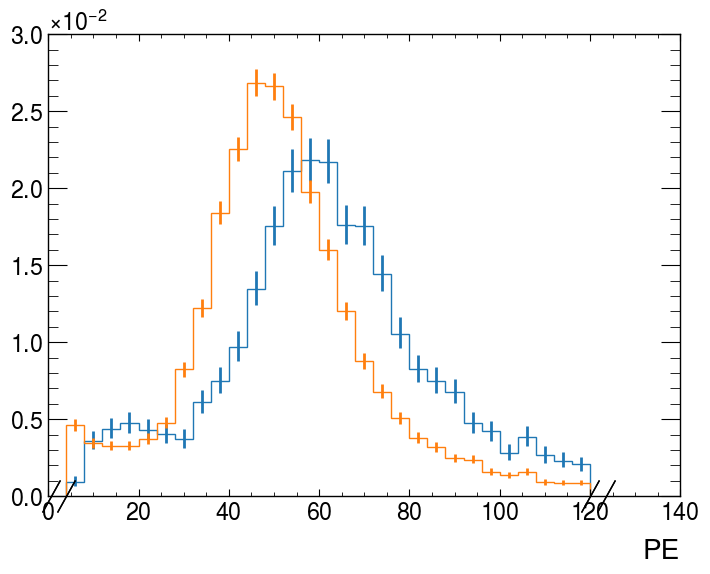

In [9]:
file_mc['CrvWidebandTest/plots/PEs_0_8'].to_hist()[5j:120j:2j].plot(density=True) #plot from 5->120 PEs and rebin by 2
file_data['plots/PEs_0_8'].to_hist()[5j:120j:2j].plot(density=True);